In [1]:
#import the packages
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#import the dataset
sale=pd.read_csv('SalesData.csv')

In [3]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [4]:
sale.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


# Understanding.ipynb for details.
# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [5]:
sales_by_region = sale.groupby('Region').agg({'Sales2015': 'sum','Sales2016': 'sum'}).reset_index()
sales_by_region

,Region,Sales2015,Sales2016
0,Central,7.891729e+06,9.787809e+06
1,East,9.512916e+06,1.266723e+07
2,West,5.349745e+06,7.209689e+06


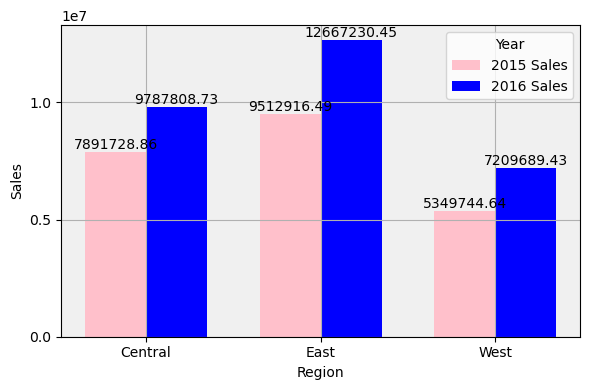

In [33]:
plt.figure(figsize=(6, 4))
bar_width = 0.35
index = range(len(sales_by_region))

bar1=plt.bar(index, sales_by_region['Sales2015'], bar_width,color='pink', label='2015 Sales')
bar2=plt.bar([i + bar_width for i in index], sales_by_region['Sales2016'], bar_width,color='blue', label='2016 Sales')

plt.xlabel('Region')
plt.ylabel('Sales')

plt.xticks([i + bar_width / 2 for i in index], sales_by_region['Region'])
plt.gca().set_yticks([0, 5000000, 10000000])
plt.legend(title='Year')
plt.tight_layout()
plt.grid()
plt.gca().set_facecolor('#f0f0f0')

for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.show()

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [7]:

sales_by_factors_2016 = sale.groupby('Region').agg({'Sales2016': 'sum'})
sales_by_factors_2016

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


In [15]:
colors = ['#FF0000','#008000','#0000FF']

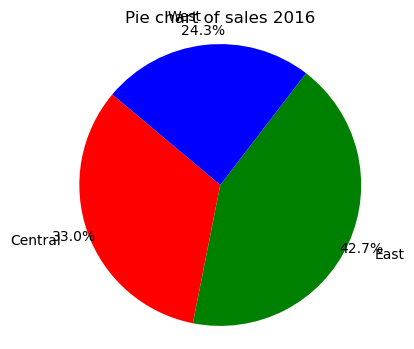

In [42]:
plt.figure(figsize=(4,4))
plt.pie(sales_by_factors_2016['Sales2016'], labels=sales_by_factors_2016.index, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=1.1,  labeldistance=1.2)
plt.title('Pie chart of sales 2016')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [21]:
sales_grouped = sale.groupby(['Region', 'Tier']).agg({'Sales2015': 'sum','Sales2016': 'sum'}).reset_index()
sales_grouped

,Region,Tier,Sales2015,Sales2016
0,Central,High,4.798698e+06,6.026043e+06
1,Central,Low,9.434397e+05,1.132833e+06
2,Central,Med,2.068226e+06,2.632181e+06
3,Central,Out,8.136489e+04,-3.248530e+03
4,East,High,6.102946e+06,7.817151e+06
5,East,Low,9.016658e+05,1.144930e+06
6,East,Med,2.470998e+06,3.705150e+06
7,East,Out,3.730655e+04,0.000000e+00
8,West,High,2.944789e+06,3.768038e+06
9,West,Low,6.710644e+05,1.099502e+06


In [40]:
def plot_region_sales(region_data, region_name):
    tiers = region_data['Tier']
    sales_2015 = region_data['Sales2015']
    sales_2016 = region_data['Sales2016']
    
    fig, ax = plt.subplots(figsize=(6, 4))
    width = 0.35 
    
    ind = range(len(tiers))
    
    
    bars_2015 = ax.bar(ind, sales_2015, width, label='Sales 2015')
    bars_2016 = ax.bar([i + width for i in ind], sales_2016, width, label='Sales 2016')
    
    ax.set_facecolor('#f0f0f0') 
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

    ax.set_xlabel('Tier')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Sales Comparison (2015 vs 2016) - {region_name}')
    ax.set_xticks([i + width / 2 for i in ind])
    ax.set_xticklabels(tiers)
    ax.legend()

    plt.tight_layout()
    plt.show()
    
  

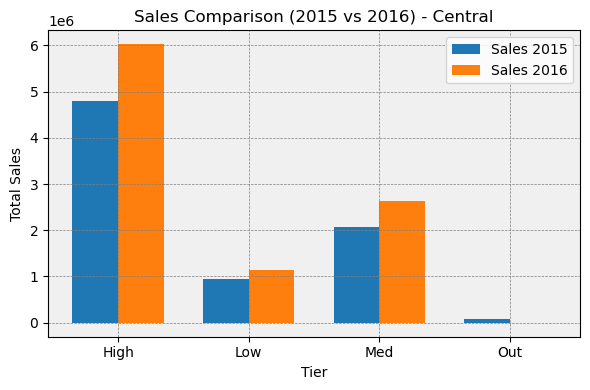

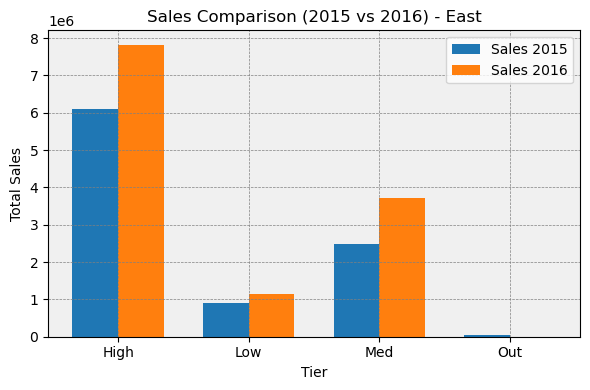

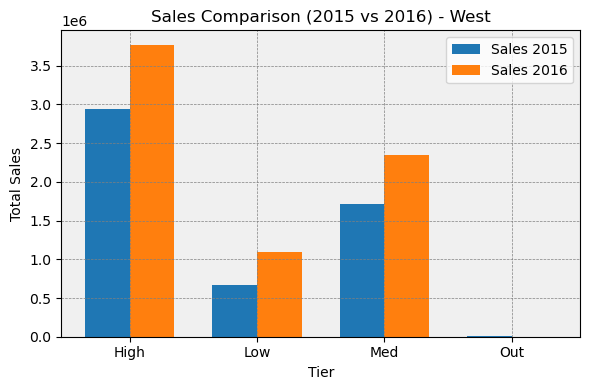

In [41]:
regions = sales_grouped['Region'].unique()
for region in regions:
    region_data = sales_grouped[sales_grouped['Region'] == region]
    plot_region_sales(region_data, region)

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [43]:
east_data = sale[sale['Region'] == 'East']

In [44]:
east_data['SalesChange'] = east_data['Sales2016'] - east_data['Sales2015']


C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\864771534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_data['SalesChange'] = east_data['Sales2016'] - east_data['Sales2015']


In [47]:
states_decline = east_data[east_data['SalesChange'] < 0]
states_decline[['State', 'Sales2015', 'Sales2016', 'SalesChange']]

,State,Sales2015,Sales2016,SalesChange
3,CT,19881.00,13254.00,-6627.00
4,MA,3684.48,0.00,-3684.48
7,CT,4153.89,3918.77,-235.12
13,NJ,2209.00,0.00,-2209.00
16,NJ,11522.85,3475.93,-8046.92
...,...,...,...,...
3668,GA,23511.84,22947.23,-564.61
3669,MD,2707.11,0.00,-2707.11
3700,NY,7368.96,0.00,-7368.96
3704,NY,3684.48,0.00,-3684.48


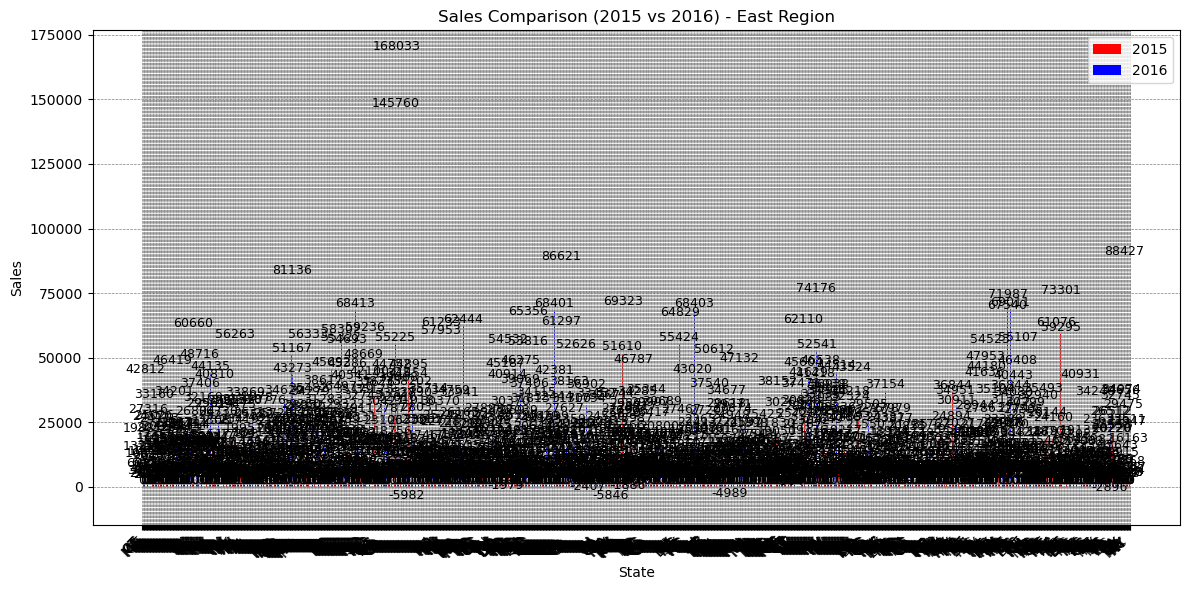

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

num_states = len(east_data)

bar_width = 0.35

ind = np.arange(num_states)

colors_2015 = ['red'] * num_states
colors_2016 = ['blue'] * num_states

bars_2015 = ax.bar(ind, east_data['Sales2015'], bar_width, label='2015', color=colors_2015)
bars_2016 = ax.bar(ind + bar_width, east_data['Sales2016'], bar_width, label='2016', color=colors_2016)

ax.set_xlabel('State')
ax.set_ylabel('Sales')
ax.set_title('Sales Comparison (2015 vs 2016) - East Region')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(east_data['State'])
ax.legend()

ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9)

add_value_labels(bars_2015)
add_value_labels(bars_2016)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


In [69]:
units_grouped = sale.groupby('Division').agg({'Units2015': 'sum', 'Units2016': 'sum'}).reset_index()

units_grouped

,Division,Units2015,Units2016
0,BIG APPLE,297.8330,356.0000
1,CHARGERS,228.8333,312.4999
2,CONGRESSIONAL,306.5012,413.0006
3,DIAMONDBACK,303.5001,419.0001
4,EMPIRE,529.8335,563.3336
5,GRIDIRON,278.0006,340.1675
6,GULF STREAM,395.8333,624.3343
7,HAILSTORM,350.0003,456.1669
8,KINETIC,371.3334,434.5001
9,MINUTEMEN,310.0000,484.5000


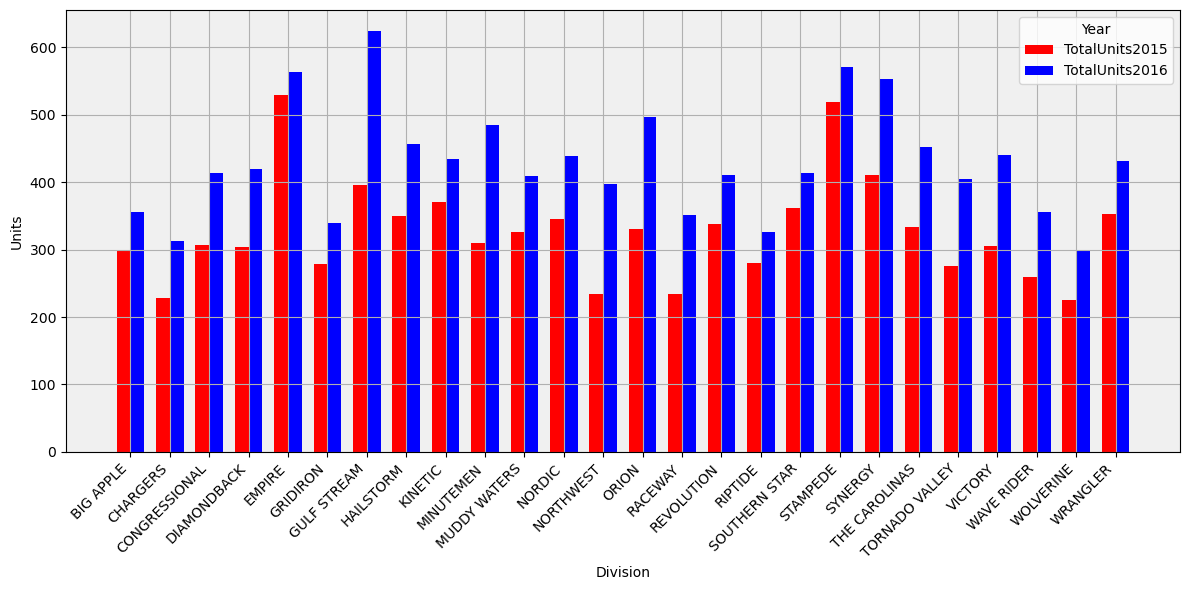

In [90]:
num_divisions = len(units_grouped)

bar_width = 0.35

ind = np.arange(num_divisions)

fig, ax = plt.subplots(figsize=(12, 6))
bars_2015 = ax.bar(ind, units_grouped['Units2015'], bar_width, label='TotalUnits2015', color='red')
bars_2016 = ax.bar(ind + bar_width, units_grouped['Units2016'], bar_width, label='TotalUnits2016', color='blue')


ax.set_xlabel('Division')
ax.set_ylabel('Units')

ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(units_grouped['Division'])
ax.legend()



def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9)



plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.grid()
plt.gca().set_facecolor('#f0f0f0')
plt.legend(title='Year')
plt.show()

# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
#dataset. The Quarters are based on months and defined as -
#• Jan - Mar : Q1
#• Apr - Jun : Q2
#• Jul - Sep : Q3
#• Oct - Dec : Q4

In [80]:
sale['Qtr'] = np.where(sale['Month'].isin(['Jan','Feb','Mar']), 'Q1',
                     np.where(sale['Month'].isin(['Apr','May','Jun']), 'Q2',
                     np.where(sale['Month'].isin(['Jul','Aug','Sep']), 'Q3',
                     np.where(sale['Month'].isin(['Oct','Nov','Dec']), 'Q4', 'Unknown'))))

In [81]:
sale.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [84]:
quarterly_sales = sale.groupby('Qtr').agg({'Sales2015': 'sum', 'Sales2016':'sum'})
quarterly_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


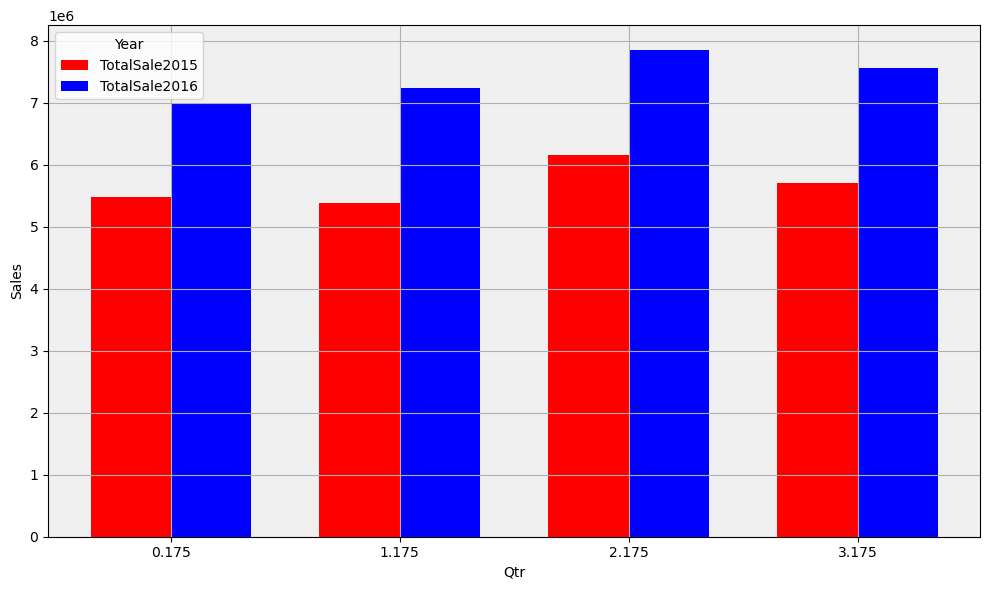

In [89]:
num_quarters = len(quarterly_sales)

bar_width = 0.35

ind = np.arange(num_quarters)

fig, ax = plt.subplots(figsize=(10, 6))
bars_2015 = ax.bar(ind, quarterly_sales['Sales2015'], bar_width, label='TotalSale2015', color='red')
bars_2016 = ax.bar(ind + bar_width, quarterly_sales['Sales2016'], bar_width, label='TotalSale2016', color='blue')


ax.set_xlabel('Qtr')
ax.set_ylabel('Sales')
ax.set_xticks(ind + bar_width / 2)

ax.legend()



def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid()
plt.gca().set_facecolor('#f0f0f0')
plt.legend(title='Year')
plt.show()

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
 #(Draw 4 pie charts representing a Quarter for each Tier)

In [97]:
sale['Sales2016'] = sale['Sales2016'].apply(lambda x: x if x > 0 else 0)


In [98]:
qtr_tier_sales = sale.groupby(['Qtr', 'Tier']).agg({'Sales2016': 'sum'}).reset_index()

qtr_tier_sales

,Qtr,Tier,Sales2016
0,Q1,High,3.939153e+06
1,Q1,Low,9.510418e+05
2,Q1,Med,2.183563e+06
3,Q1,Out,0.000000e+00
4,Q2,High,4.134530e+06
5,Q2,Low,8.959321e+05
6,Q2,Med,2.218725e+06
7,Q2,Out,0.000000e+00
8,Q3,High,4.875456e+06
9,Q3,Low,7.973867e+05


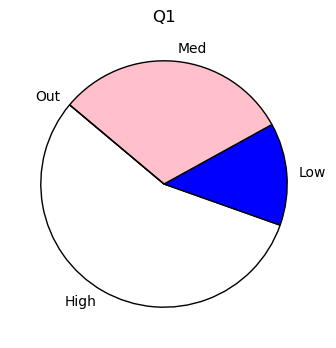

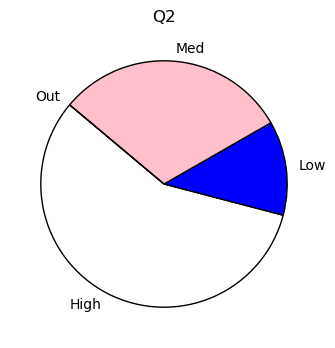

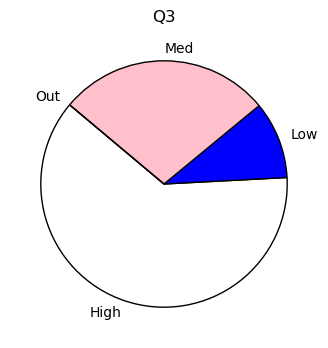

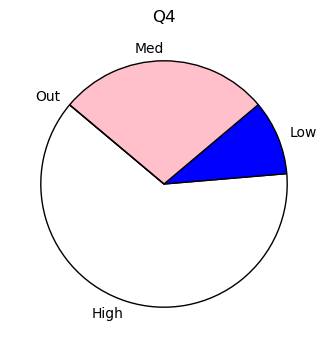

In [113]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
tier_colors = {
    'High': 'white',
    'Med': 'pink',
    'Low': 'blue',
    'Out': 'cyan'
}

for qtr in quarters:
    qtr_data = qtr_tier_sales[qtr_tier_sales['Qtr'] == qtr]
    
    colors = [tier_colors[tier] for tier in qtr_data['Tier']]
    
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(qtr_data['Sales2016'], labels=qtr_data['Tier'], startangle=140,colors=colors,wedgeprops={'edgecolor':'black'})
    
    
    
    ax.set_title(qtr)
    

        
    plt.show()